In [141]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Define function to fetch data from each database
def fetch_data(database_path, query):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    conn.close()
    return results

# Queries for each database
query_deliveroo = """
SELECT 
    category,
    ROUND(AVG(rating), 2) as average_rating,
    'Deliveroo' AS source
FROM 
    restaurants
WHERE 
    category IN ('Italian', 'Burgers', 'Sushi', 'Turkish', 'Thai')
GROUP BY category;
"""

query_takeaway = """
SELECT 
    CASE
        WHEN categories_restaurants.category_id = 'italian-pizza_271' THEN 'Italian'
        WHEN categories_restaurants.category_id = 'pasta_1614' THEN 'Italian'
        WHEN categories_restaurants.category_id = 'burgers_1984' THEN 'Burgers'
        WHEN categories_restaurants.category_id = 'curry_731,' THEN 'Thai'
        WHEN categories_restaurants.category_id = 'thai_61' THEN 'Thai'
        WHEN categories_restaurants.category_id = 'pita-kebab_651' THEN 'Turkish'
        WHEN categories_restaurants.category_id = 'shoarma_2014' THEN 'Turkish'
        WHEN categories_restaurants.category_id = 'sushi_51' THEN 'Sushi'
        WHEN categories_restaurants.category_id = 'japanene_551' THEN 'Sushi'
        WHEN categories_restaurants.category_id = 'turkish-pizza' THEN 'Turkish'
        WHEN categories_restaurants.category_id = 'turkish_511' THEN 'Turkish'
        ELSE categories_restaurants.category_id
    END AS category,
    ROUND(AVG(restaurants.ratings), 2) AS average_rating,
    'Takeaway' AS source
FROM 
    categories_restaurants
INNER JOIN  
    restaurants
ON
    categories_restaurants.restaurant_id = restaurants.primarySlug
WHERE 
    category IN ('Italian', 'Burgers', 'Sushi', 'Turkish', 'Thai')
GROUP BY 
    category
ORDER BY 
    COUNT(categories_restaurants.category_id) DESC;
"""

query_ubereats = """
SELECT 
    CASE
        WHEN restaurant_to_categories.category = 'Kebab' THEN 'Turkish'
        WHEN restaurant_to_categories.category = 'Turks' THEN 'Turkish'
        WHEN restaurant_to_categories.category = 'Turque' THEN 'Turkish'        
        WHEN restaurant_to_categories.category = 'Japans' THEN 'Sushi'
        WHEN restaurant_to_categories.category = 'Japonaise' THEN 'Sushi'
        WHEN restaurant_to_categories.category = 'Pizza' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Pizzas' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Italiaans' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Italienne' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Pasta' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Hamburgers' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'Amerikaans' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'AmÃ©ricain' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'curry_731,' THEN 'Thai'
        WHEN restaurant_to_categories.category = 'Thais' THEN 'Thai'
        ELSE restaurant_to_categories.category
    END AS category,
    ROUND(AVG(restaurants.rating__rating_value), 2) AS average_rating,
    'Ubereats' AS source 
FROM restaurant_to_categories
INNER JOIN 
    restaurants 
ON 
    restaurants.id = restaurant_to_categories.restaurant_id
WHERE 
    restaurant_to_categories.category IN ('Kebab', 'Turks', 'Turque', 'Japans', 'Japonaise', 'Pizza', 'Pizzas', 'Italiaans', 'Italienne', 'Pasta', 'Hamburgers', 'Amerikaans', 'AmÃ©ricain', 'curry_731,', 'Thais')
GROUP BY 
    CASE
        WHEN restaurant_to_categories.category = 'Kebab' THEN 'Turkish'
        WHEN restaurant_to_categories.category = 'Turks' THEN 'Turkish'
        WHEN restaurant_to_categories.category = 'Turque' THEN 'Turkish'        
        WHEN restaurant_to_categories.category = 'Japans' THEN 'Sushi'
        WHEN restaurant_to_categories.category = 'Japonaise' THEN 'Sushi'
        WHEN restaurant_to_categories.category = 'Pizza' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Pizzas' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Italiaans' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Italienne' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Pasta' THEN 'Italian'
        WHEN restaurant_to_categories.category = 'Hamburgers' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'Amerikaans' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'AmÃ©ricain' THEN 'Burgers'
        WHEN restaurant_to_categories.category = 'curry_731,' THEN 'Thai'
        WHEN restaurant_to_categories.category = 'Thais' THEN 'Thai'
        ELSE restaurant_to_categories.category
    END;
"""

# Fetch data from each database
deliveroo_data = fetch_data("Databases/deliveroo.db", query_deliveroo)
takeaway_data = fetch_data("Databases/takeaway.db", query_takeaway)
ubereats_data = fetch_data("Databases/ubereats.db", query_ubereats)

# Combine data using pandas
all_data = deliveroo_data + takeaway_data + ubereats_data
columns = ['Category', 'Average rating', 'Platform']
df = pd.DataFrame(all_data, columns=columns)

# Calculate average ratings by category and source
df_result = df.groupby(['Category', 'Platform']).agg({'Average rating': 'mean'}).reset_index()
df_result['Average rating'] = df_result['Average rating'].round(2)

# Display the result
print(df_result)


   Category   Platform  Average rating
0   Burgers  Deliveroo            2.75
1   Burgers   Takeaway            3.64
2   Burgers   Ubereats            4.19
3   Italian  Deliveroo            2.90
4   Italian   Takeaway            3.78
5   Italian   Ubereats            4.26
6     Sushi  Deliveroo            2.70
7     Sushi   Takeaway            4.01
8     Sushi   Ubereats            4.40
9      Thai  Deliveroo            3.04
10     Thai   Takeaway            4.02
11     Thai   Ubereats            4.39
12  Turkish  Deliveroo            3.01
13  Turkish   Takeaway            3.86
14  Turkish   Ubereats            4.23


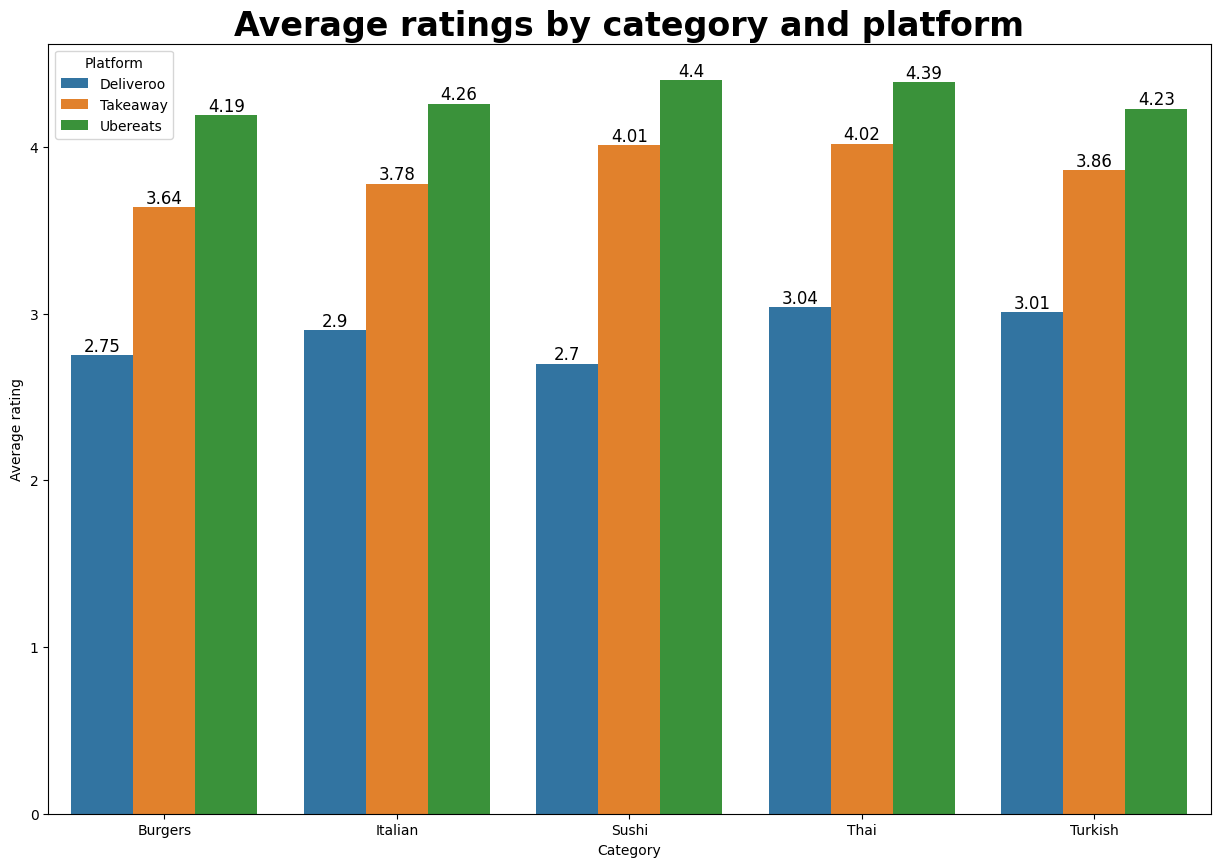

In [143]:
# Plot
plt.figure(figsize=(15, 10))
plot = sns.barplot(data=df_result, x="Category", y="Average rating", hue="Platform")
plot.bar_label(plot.containers[0], fontsize=12)
plot.bar_label(plot.containers[1], fontsize=12)
plot.bar_label(plot.containers[2], fontsize=12)
plt.title("Average ratings by category and platform", fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.show()